# *EDA Credit Case Study Code Stub* #


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.4f}'.format
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## Data Cleaning ##

### 1: Reading the data

In [3]:
## Reading the application_data.csv file in a dataframe called appl_df
appl_df=pd.read_csv("application_data.csv")

### 2: Inspecting the dataframe

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [4]:
appl_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0000,406597.5000,24700.5000,351000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0188,-9461,-637,-3648.0000,-2120,nan,1,1,0,1,1,0,Laborers,1.0000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.0830,0.2629,0.1394,0.0247,0.0369,0.9722,0.6192,0.0143,0.0000,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.0000,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0000,2.0000,2.0000,2.0000,-1134.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
1,100003,0,Cash loans,F,N,N,0,270000.0000,1293502.5000,35698.5000,1129500.0000,Family,State servant,Higher education,Married,House / apartment,0.0035,-16765,-1188,-1186.0000,-291,nan,1,1,0,1,1,0,Core staff,2.0000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.3113,0.6222,nan,0.0959,0.0529,0.9851,0.7960,0.0605,0.0800,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0000,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.0800,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0000,0.0000,1.0000,0.0000,-828.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0000,135000.0000,6750.0000,135000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0100,-19046,-225,-4260.0000,-2531,26.0000,1,1,1,1,1,0,Laborers,1.0000,2,2,MONDAY,9,0,0,0,0,0,0,Government,nan,0.5559,0.

In [5]:
# Check the number of rows and columns in the dataframe

appl_df.shape

(307511, 122)

In [6]:
# Check the column-wise info of the dataframe
appl_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [7]:
# Check the summary for the numeric columns 
appl_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307499.0000,307233.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,104582.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307509.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,134133.0000,306851.0000,246546.0000,151450.0000,127568.0000,157504.0000,103023.0000,92646.0000,143620.0000,152683.0000,154491.0000,98869.0000,124921.0000,97312.0000,153161.0000,93997.0000,137829.0000,151450.0000,127568.0000,157504.0000,103023.0000,92646.0000,143620.0000,152683.0000,154491.0000,98869.0000,124921.0000,97312.0000,153161.0000,93997.0000,137829.0000,151450.0000,127568.0000,157504.0000,103023.0000,92646.0000,143620.0000,152683.0000,154491.0000,98869.0000,124921.0000,97312.0000,153161.0000,93997.0000,137829.0000,159080.0000,306490.0000,306490.0000,306490.0000,306490.0000,307510.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,265992.0000,265992.0000,265992.0000,265992.0000,265992.0000,265992.0000
mean,278180.5186,0.0807,0.4171,168797.9193,599025.9997,27108.5739,538396.2074,0.0209,-16036.9951,63815.0459,-4986.1203,-2994.2024,12.0611,1.0000,0.8199,0.1994,0.9981,0.2811,0.0567,2.1527,2.0525,2.0315,12.0634,0.0151,0.0508,0.0407,0.0782,0.2305,0.1796,0.5021,0.5144,0.5109,0.1174,0.0884,0.9777,0.7525,0.0446,0.0789,0.1497,0.2263,0.2319,0.0663,0.1008,0.1074,0.0088,0.0284,0.1142,0.0875,0.9771,0.7596,0.0426,0.0745,0.1452,0.2223,0.2281,0.0650,0.1056,0.1060,0.0081,0.0270,0.1178,0.0880,0.9778,0.7557,0.0446,0.0781,0.1492,0.2259,0.2316,0.0672,0.1020,0.1086,0.0087,0.0282,0.1025,1.4222,0.1434,1.4053,0.1000,-962.8588,0.0000,0.7100,0.0001,0.0151,0.0881,0.0002,0.0814,0.0039,0.0000,0.0039,0.0000,0.0035,0.0029,0.0012,0.0099,0.0003,0.0081,0.0006,0.0005,0.0003,0.0064,0.0070,0.0344,0.2674,0.2655,1.9000
std,102790.1753,0.2724,

### 3: Handling Null vlaues and Missing Values

In [8]:
#check the number of null values
appl_df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [9]:
#checking the percentage of null values
appl_df.isnull().mean()*100 

SK_ID_CURR                      0.0000
TARGET                          0.0000
NAME_CONTRACT_TYPE              0.0000
CODE_GENDER                     0.0000
FLAG_OWN_CAR                    0.0000
FLAG_OWN_REALTY                 0.0000
CNT_CHILDREN                    0.0000
AMT_INCOME_TOTAL                0.0000
AMT_CREDIT                      0.0000
AMT_ANNUITY                     0.0039
AMT_GOODS_PRICE                 0.0904
NAME_TYPE_SUITE                 0.4201
NAME_INCOME_TYPE                0.0000
NAME_EDUCATION_TYPE             0.0000
NAME_FAMILY_STATUS              0.0000
NAME_HOUSING_TYPE               0.0000
REGION_POPULATION_RELATIVE      0.0000
DAYS_BIRTH                      0.0000
DAYS_EMPLOYED                   0.0000
DAYS_REGISTRATION               0.0000
DAYS_ID_PUBLISH                 0.0000
OWN_CAR_AGE                    65.9908
FLAG_MOBIL                      0.0000
FLAG_EMP_PHONE                  0.0000
FLAG_WORK_PHONE                 0.0000
FLAG_CONT_MOBILE         

In [10]:
#To remove the columns with missing values higher than 50% 
appl_df = appl_df.loc[:,appl_df.isnull().mean()<.5]


In [11]:
appl_df.shape

(307511, 81)

* Total 81 columns are left after removing the columns which has less than 50% on null values

In [12]:
#checking the null value percenatages for each column in application_data.csv
appl_df.isnull().mean()*100 

SK_ID_CURR                      0.0000
TARGET                          0.0000
NAME_CONTRACT_TYPE              0.0000
CODE_GENDER                     0.0000
FLAG_OWN_CAR                    0.0000
FLAG_OWN_REALTY                 0.0000
CNT_CHILDREN                    0.0000
AMT_INCOME_TOTAL                0.0000
AMT_CREDIT                      0.0000
AMT_ANNUITY                     0.0039
AMT_GOODS_PRICE                 0.0904
NAME_TYPE_SUITE                 0.4201
NAME_INCOME_TYPE                0.0000
NAME_EDUCATION_TYPE             0.0000
NAME_FAMILY_STATUS              0.0000
NAME_HOUSING_TYPE               0.0000
REGION_POPULATION_RELATIVE      0.0000
DAYS_BIRTH                      0.0000
DAYS_EMPLOYED                   0.0000
DAYS_REGISTRATION               0.0000
DAYS_ID_PUBLISH                 0.0000
FLAG_MOBIL                      0.0000
FLAG_EMP_PHONE                  0.0000
FLAG_WORK_PHONE                 0.0000
FLAG_CONT_MOBILE                0.0000
FLAG_PHONE               

* As seen in the above step , we have few columns which have a null value percent less than 13% , we are selecting 5 columns namely -
NAME_TYPE_SUITE,AMT_GOODS_PRICE,CNT_FAM_MEMBERS, AMT_ANNUITY,DAYS_LAST_PHONE_CHANGE to analyze and determine which
imputation technique can be used

#### Column 1: NAME_TYPE_SUITE : This is a categorical column

In [13]:
#using value_counts(normalize=True) for calculating the relative percentage of the unique values in NAME_TYPE_SUITE 

appl_df.NAME_TYPE_SUITE.value_counts(normalize=True)

Unaccompanied     0.8116
Family            0.1311
Spouse, partner   0.0371
Children          0.0107
Other_B           0.0058
Other_A           0.0028
Group of people   0.0009
Name: NAME_TYPE_SUITE, dtype: float64

As seen above ,"Unaccompanied" has the highest percentage and as this column is categorical , we will calucluate the mode for this

In [14]:
#calculating mode
appl_df.NAME_TYPE_SUITE.mode()

0    Unaccompanied
dtype: object

##### As the mode value came out to be  "Unaccompanied" , we will impute the missing values in column 'NAME_TYPE_SUITE' with it.

#### Column 2: AMT_GOODS_PRICE : This is a continuous  variable

In [15]:
appl_df.AMT_GOODS_PRICE.describe()

count    307233.0000
mean     538396.2074
std      369446.4605
min       40500.0000
25%      238500.0000
50%      450000.0000
75%      679500.0000
max     4050000.0000
Name: AMT_GOODS_PRICE, dtype: float64

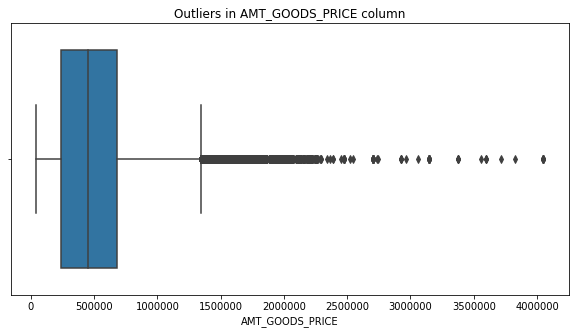

In [16]:
#Checking for the outlier of the AMT_GOODS_PRICE column
plt.figure(figsize=[10,5])
plt.title("Outliers in AMT_GOODS_PRICE column")
sns.boxplot(appl_df['AMT_GOODS_PRICE'])
plt.show()

##### As the AMT_GOODS_PRICE column have significant number of outliers as there is huge diffrence between  max and 75% so ,we can  impute missing values with median value 450000.0000.

#### Column 3: CNT_FAM_MEMBERS : This is a continuous  categorical variable

In [17]:
#checking the various values and it's count for the column
appl_df.CNT_FAM_MEMBERS.value_counts()

2.0000     158357
1.0000      67847
3.0000      52601
4.0000      24697
5.0000       3478
6.0000        408
7.0000         81
8.0000         20
9.0000          6
10.0000         3
14.0000         2
16.0000         2
12.0000         2
20.0000         2
11.0000         1
13.0000         1
15.0000         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [18]:
#calculating mode as it is a categorical column 
appl_df.CNT_FAM_MEMBERS.mode()

0   2.0000
dtype: float64

##### As the mode value came out to be  "2.0" , we will impute the missing values in column 'CNT_FAM_MEMBERS' with it.

#### Column 4: DAYS_LAST_PHONE_CHANGE : This is a continuous variable

##### The null value percenatge for DAYS_LAST_PHONE_CHANGE column is very less = 0.000325 hence we can impute  the missing values with 0

#### Column 5: AMT_ANNUITY : This is a continuous  variable

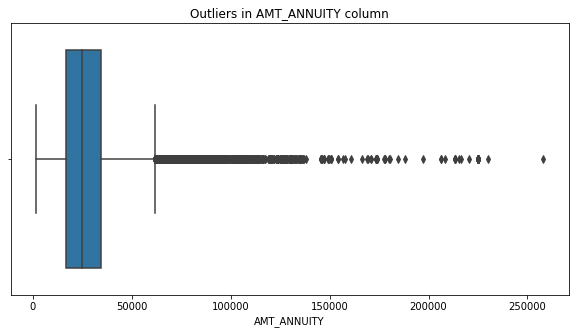

In [19]:
#Checking fo rthe outlier of the AMT_ANNUITY column
plt.figure(figsize=[10,5])
plt.title("Outliers in AMT_ANNUITY column")
sns.boxplot(appl_df['AMT_ANNUITY'])
plt.show()

In [20]:
appl_df.AMT_ANNUITY.describe()

count   307499.0000
mean     27108.5739
std      14493.7373
min       1615.5000
25%      16524.0000
50%      24903.0000
75%      34596.0000
max     258025.5000
Name: AMT_ANNUITY, dtype: float64

##### The column 'AMT_ANNUITY' has an outlier so for this we can impute missing values with median value 24903.000000 .

#### Checking for various categories for  ORGANIZATION_TYPE and CODE_GENDER columns

In [21]:
#checking disticnt values and their counts ORGANIZATION_TYPE
appl_df['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [22]:
#There are 55374 XNA values, we will replace them with NAN's
appl_df['ORGANIZATION_TYPE']=appl_df['ORGANIZATION_TYPE'].replace('XNA',np.NaN)


In [23]:
# XNA values are replaced
appl_df['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

In [24]:
#checking disticnt values and their counts CODE_GENDER
appl_df.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [25]:
#There are 4 XNA values, we will replace them with NaN's
appl_df['CODE_GENDER']=appl_df['CODE_GENDER'].replace('XNA',np.NaN)

In [26]:
# XNA values are replaced
appl_df.CODE_GENDER.value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

### 4: Checking Data Types and Fixing them

In [27]:
#checking the datatypes of all columns
appl_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307507 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [28]:
#checking the unique values in each column
appl_df.nunique().sort_values()

FLAG_DOCUMENT_3                      2
FLAG_PHONE                           2
FLAG_DOCUMENT_4                      2
FLAG_DOCUMENT_2                      2
REG_REGION_NOT_LIVE_REGION           2
REG_REGION_NOT_WORK_REGION           2
LIVE_REGION_NOT_WORK_REGION          2
REG_CITY_NOT_LIVE_CITY               2
REG_CITY_NOT_WORK_CITY               2
LIVE_CITY_NOT_WORK_CITY              2
FLAG_DOCUMENT_14                     2
FLAG_DOCUMENT_13                     2
FLAG_DOCUMENT_12                     2
FLAG_DOCUMENT_11                     2
FLAG_DOCUMENT_10                     2
FLAG_DOCUMENT_9                      2
FLAG_DOCUMENT_8                      2
FLAG_DOCUMENT_7                      2
EMERGENCYSTATE_MODE                  2
FLAG_DOCUMENT_6                      2
FLAG_CONT_MOBILE                     2
FLAG_WORK_PHONE                      2
FLAG_EMAIL                           2
FLAG_MOBIL                           2
TARGET                               2
NAME_CONTRACT_TYPE       

##### We have identified columns - DAYS_REGISTRATION ,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE ,DAYS_BIRTH ,DAYS_ID_PUBLISH ,DAYS_EMPLOYED  to change the data  to int from float as the columns are number of days and also some columns have negative values. As these columns show the number of days, we are using abs() function to convert them to positive values

In [29]:
# typecasting from float to int and taking absolute values
appl_df["DAYS_REGISTRATION"]= appl_df["DAYS_REGISTRATION"].astype(int).abs()
appl_df['CNT_FAM_MEMBERS']= appl_df['CNT_FAM_MEMBERS'].fillna(0).astype(int).abs()
appl_df['DAYS_LAST_PHONE_CHANGE']=appl_df['DAYS_LAST_PHONE_CHANGE'].fillna(0).astype(int).abs()
appl_df['DAYS_BIRTH']=appl_df['DAYS_BIRTH'].abs()
appl_df['DAYS_ID_PUBLISH']=appl_df['DAYS_ID_PUBLISH'].abs()
appl_df['DAYS_EMPLOYED']=appl_df['DAYS_EMPLOYED'].abs()

In [30]:
appl_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0000,406597.5000,24700.5000,351000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0188,9461,637,3648,2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.2629,0.1394,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0000,2.0000,2.0000,2.0000,1134,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
1,100003,0,Cash loans,F,N,N,0,270000.0000,1293502.5000,35698.5000,1129500.0000,Family,State servant,Higher education,Married,House / apartment,0.0035,16765,1188,1186,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.6222,nan,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0000,0.0000,1.0000,0.0000,828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0000,135000.0000,6750.0000,135000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0100,19046,225,4260,2531,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.5559,0.7296,nan,nan,nan,nan,nan,nan,nan,NaN,0.0000,0.0000,0.0000,0.0000,815,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,100006,0,Cash loans,F,N,Y,0,135000.0000,312682.5000,29686.5000,297000.0000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.0080,19005,3039,9833,2437,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.6504,nan,nan,nan,nan,nan,nan,nan,nan,NaN,2.0000,0.0000,2.0000,0.0000,617,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan
4,100007,0,Cash loans,M,N,Y,0,121500.0000,513000.0000,21865.5000,513000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0287,19932,3038,4311,3458,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.3227,nan,nan,nan,nan,nan,nan,nan,nan,NaN,0.0000,0.0000,0.0000,0.0000,1106,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [31]:
#checking if the days are converted to positive values
appl_df["DAYS_EMPLOYED"].value_counts()

365243    55374
200         156
224         152
199         151
230         151
          ...  
11555         1
14832         1
14719         1
13344         1
10893         1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

In [32]:
#checking the datatypes 
appl_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307507 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [33]:
appl_df["DAYS_REGISTRATION"].value_counts()  

1        113
7         98
6         96
4         92
2         92
        ... 
16520      1
18926      1
14816      1
14880      1
12772      1
Name: DAYS_REGISTRATION, Length: 15687, dtype: int64

In [34]:
appl_df['CNT_FAM_MEMBERS'].value_counts()

2     158357
1      67847
3      52601
4      24697
5       3478
6        408
7         81
8         20
9          6
10         3
20         2
16         2
12         2
14         2
0          2
11         1
13         1
15         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [35]:
appl_df['DAYS_LAST_PHONE_CHANGE'].value_counts()

0       37673
1        2812
2        2318
3        1763
4        1285
        ...  
3963        1
3788        1
3789        1
3533        1
3771        1
Name: DAYS_LAST_PHONE_CHANGE, Length: 3773, dtype: int64

In [36]:
appl_df['DAYS_BIRTH'].value_counts()

13749    43
13481    42
10020    41
18248    41
15771    40
         ..
7861      1
25017     1
25135     1
7856      1
24328     1
Name: DAYS_BIRTH, Length: 17460, dtype: int64

In [37]:
appl_df['DAYS_ID_PUBLISH'].value_counts()

4053    169
4095    162
4046    161
4417    159
4256    158
       ... 
6076      1
5696      1
6162      1
6203      1
6028      1
Name: DAYS_ID_PUBLISH, Length: 6168, dtype: int64

In [38]:
appl_df['DAYS_EMPLOYED'].value_counts()

365243    55374
200         156
224         152
199         151
230         151
          ...  
11555         1
14832         1
14719         1
13344         1
10893         1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

In [39]:
appl_df['DAYS_ID_PUBLISH']


0         2120
1          291
2         2531
3         2437
4         3458
          ... 
307506    1982
307507    4090
307508    5150
307509     931
307510     410
Name: DAYS_ID_PUBLISH, Length: 307511, dtype: int64

### 5: Checking Outliers for numerical columns

Selecting below columns for Outlier analysis
1.CNT_CHILDREN
2.AMT_INCOME_TOTAL
3.AMT_CREDIT
4.DAYS_ID_PUBLISH
5.DAYS_REGISTRATION

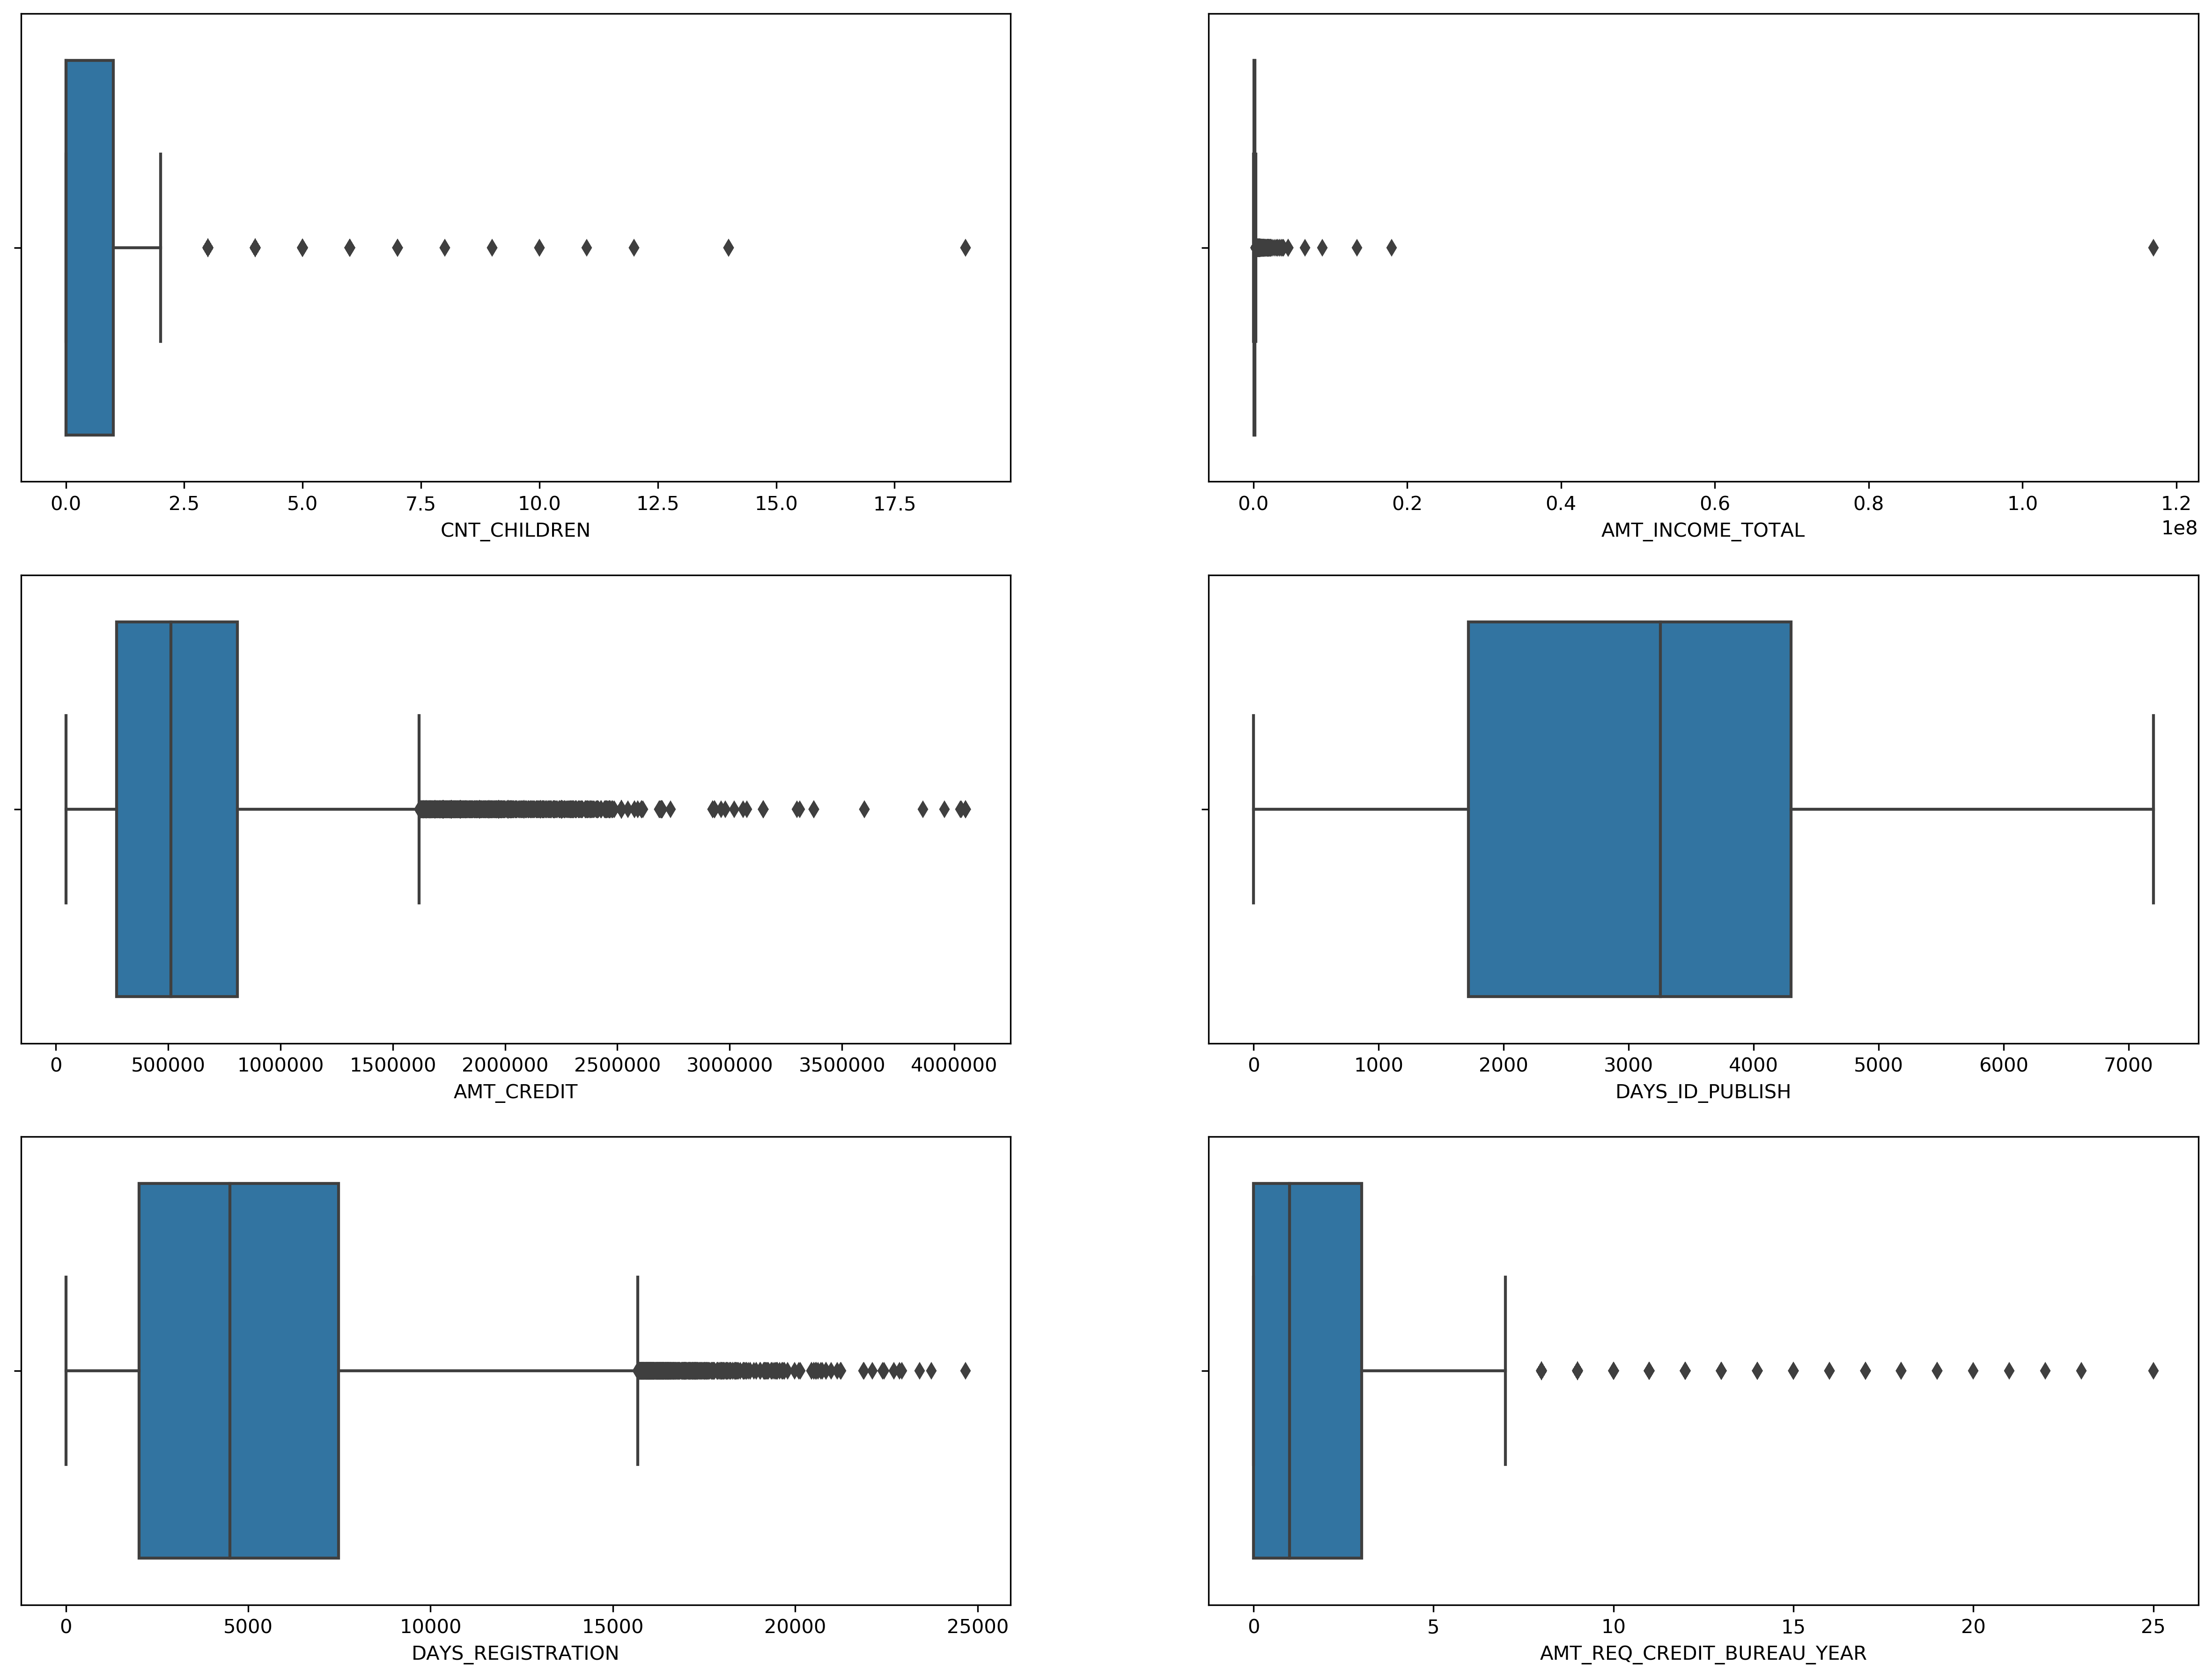

In [40]:
# using enumerate to and for loop to plot boxplots fro multiple columns
outlier_col= ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','DAYS_ID_PUBLISH','DAYS_REGISTRATION','AMT_REQ_CREDIT_BUREAU_YEAR']
plt.figure(figsize=(20,15),dpi=300)
for i in enumerate(outlier_col):
    plt.subplot(3,2,i[0]+1)
    sns.boxplot(x=i[1],data=appl_df)
plt.show()

Outlier Analysis Inferences:
1.CNT_CHILDREN: Number of outliers can be found as this column contains values from 7 to 15 which is very high as this column 
    indicates the number of children for the applicant , we can impute these high values by taking mode for this column
    
2.AMT_INCOME_TOTAL: From the graph it can be seen that this column contains an outlier value, so we can impute this value with median value
3.AMT_CREDIT: From the graph it can be seen that this column contains an outlier value, so we can impute this value with median value
4.The IQR of DAYS_ID_PUBLISH  is 2500,there is no outliers in this column and most of the applicants have changed the documents with which they applied for loan.
5.DAYS_REGISTRATION: The first quartile is smaller as compared to third in DAYS_REGISTRATION column and the mean data is at first quartile
6.AMT_REQ_CREDIT_BUREAU_YEAR : The data is skewed on the left side , we can replace the value with median

### 6: Binning

In [41]:
#checking the values to determine binning range using describe function for columns AMT_GOODS_PRICE and AMT_INCOME_TOTAL
appl_df.AMT_GOODS_PRICE.describe()


count    307233.0000
mean     538396.2074
std      369446.4605
min       40500.0000
25%      238500.0000
50%      450000.0000
75%      679500.0000
max     4050000.0000
Name: AMT_GOODS_PRICE, dtype: float64

In [42]:
#Binning for continuous column 'AMT_GOODS_PRICE' 
appl_df['AMT_GOODS_PRICE_CAT']=pd.cut(appl_df['AMT_GOODS_PRICE'],[40500,125000,250000,500000,1000000,4050000],labels=['low','below_avg','avg','above_avg','high'])

In [43]:
appl_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_GOODS_PRICE_CAT
0,100002,1,Cash loans,M,N,Y,0,202500.0000,406597.5000,24700.5000,351000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0188,9461,637,3648,2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.2629,0.1394,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0000,2.0000,2.0000,2.0000,1134,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,avg
1,100003,0,Cash loans,F,N,N,0,270000.0000,1293502.5000,35698.5000,1129500.0000,Family,State servant,Higher education,Married,House / apartment,0.0035,16765,1188,1186,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.6222,nan,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0000,0.0000,1.0000,0.0000,828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,high
2,100004,0,Revolving loans,M,Y,Y,0,67500.0000,135000.0000,6750.0000,135000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0100,19046,225,4260,2531,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.5559,0.7296,nan,nan,nan,nan,nan,nan,nan,NaN,0.0000,0.0000,0.0000,0.0000,815,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,below_avg
3,100006,0,Cash loans,F,N,Y,0,135000.0000,312682.5000,29686.5000,297000.0000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.0080,19005,3039,9833,2437,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.6504,nan,nan,nan,nan,nan,nan,nan,nan,NaN,2.0000,0.0000,2.0000,0.0000,617,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan,avg
4,100007,0,Cash loans,M,N,Y,0,121500.0000,513000.0000,21865.5000,513000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0287,19932,3038,4311,3458,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.3227,nan,nan,nan,nan,nan,nan,nan,nan,NaN,0.0000,0.0000,0.0000,0.0000,1106,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,above_avg


In [44]:
#checking the values to determine binning range using describe function for column AMT_INCOME_TOTAL
appl_df.AMT_INCOME_TOTAL.describe()

count      307511.0000
mean       168797.9193
std        237123.1463
min         25650.0000
25%        112500.0000
50%        147150.0000
75%        202500.0000
max     117000000.0000
Name: AMT_INCOME_TOTAL, dtype: float64

In [45]:
#Binning for continuous column 'AMT_INCOME_TOTAL'
appl_df['AMT_INCOME_TOTAL_CAT']=pd.cut(appl_df['AMT_INCOME_TOTAL'],[25500,125000,180000,500000,117000000],labels=['below_avg','avg','high','very_high'])

In [46]:
appl_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_GOODS_PRICE_CAT,AMT_INCOME_TOTAL_CAT
0,100002,1,Cash loans,M,N,Y,0,202500.0000,406597.5000,24700.5000,351000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0188,9461,637,3648,2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.2629,0.1394,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0000,2.0000,2.0000,2.0000,1134,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,avg,high
1,100003,0,Cash loans,F,N,N,0,270000.0000,1293502.5000,35698.5000,1129500.0000,Family,State servant,Higher education,Married,House / apartment,0.0035,16765,1188,1186,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.6222,nan,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0000,0.0000,1.0000,0.0000,828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,high,high
2,100004,0,Revolving loans,M,Y,Y,0,67500.0000,135000.0000,6750.0000,135000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0100,19046,225,4260,2531,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.5559,0.7296,nan,nan,nan,nan,nan,nan,nan,NaN,0.0000,0.0000,0.0000,0.0000,815,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,below_avg,below_avg
3,100006,0,Cash loans,F,N,Y,0,135000.0000,312682.5000,29686.5000,297000.0000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.0080,19005,3039,9833,2437,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.6504,nan,nan,nan,nan,nan,nan,nan,nan,NaN,2.0000,0.0000,2.0000,0.0000,617,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan,avg,avg
4,100007,0,Cash loans,M,N,Y,0,121500.0000,513000.0000,21865.5000,513000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0287,19932,3038,4311,3458,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.3227,nan,nan,nan,nan,nan,nan,nan,nan,NaN,0.0000,0.0000,0.0000,0.0000,1106,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,above_avg,below_avg


#### As the Application_data.csv contains a huge number of columns , which would be irrelevant for analysis purpose, we are dropping those columns and reducing the col size in appl_df data frame.

In [47]:
appl_df.drop(['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','DAYS_LAST_PHONE_CHANGE','EXT_SOURCE_2','EXT_SOURCE_3','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE','FLOORSMAX_MODE','YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI','TOTALAREA_MODE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','FLAG_EMAIL','FLAG_PHONE','HOUR_APPR_PROCESS_START','DEF_60_CNT_SOCIAL_CIRCLE'],axis=1,inplace=True)

In [48]:
appl_df.shape

(307511, 47)

After deleting the irrelevant columns , we are left with 47 columns in the dataset for analysis.

## Data Analysis ##

### Check the imbalance percentage

In [49]:
#Checking the imbalance percentage
appl_df.TARGET.value_counts(normalize=True)*100

0   91.9271
1    8.0729
Name: TARGET, dtype: float64

As seen fromt he above results, we conculde that data is imbalanced.

### Divide the dataset into two sets based on Target Column

In [50]:
# creating two dataframes target=0 and target=1 
appl_target_0=appl_df.loc[appl_df['TARGET']==0]
appl_target_1=appl_df.loc[appl_df['TARGET']==1]


### Univariate analysis for Target 0 and Target 1 categorical Variable

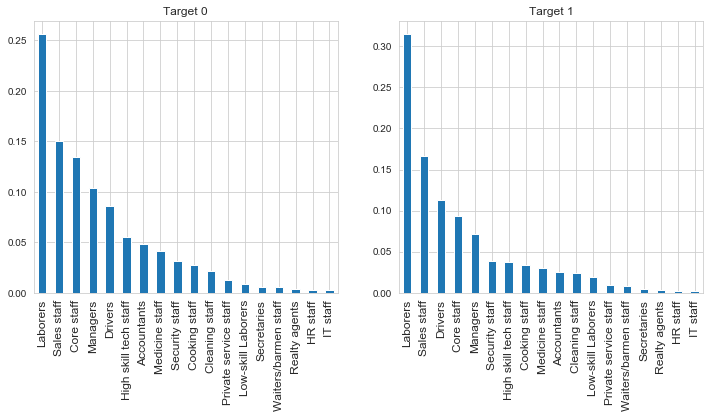

In [88]:
#plotting a barplot for OCCUPATION_TYPE 
plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
plt.xticks(fontsize=12)
appl_target_0.OCCUPATION_TYPE.value_counts(normalize=True).plot(kind='bar',title ='Target 0')
plt.subplot(1,2,2)
appl_target_1.OCCUPATION_TYPE.value_counts(normalize=True).plot(kind='bar',title ='Target 1')
plt.xticks(fontsize=12)
plt.show()

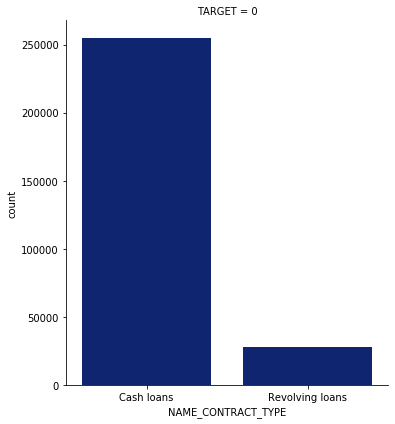

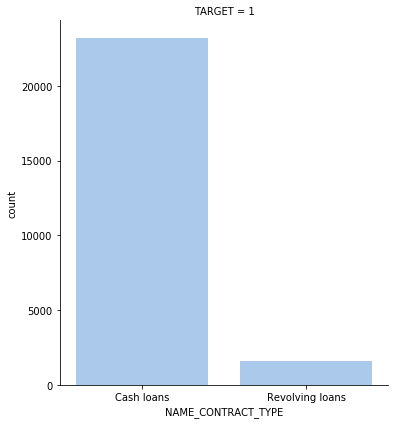

In [51]:
#plotting a catplot for NAME_CONTRACT_TYPE for both dataframes appl_target_0 and appl_target_1
sns.catplot(x="NAME_CONTRACT_TYPE", hue="TARGET",data=appl_target_0,col="TARGET", kind="count",height=6, aspect=.9,palette="dark",orient="h")
sns.catplot(x="NAME_CONTRACT_TYPE", hue="TARGET",data=appl_target_1, col="TARGET", kind="count",height=6, aspect=.9,palette="pastel",orient="h")
plt.show()               

### Correlation of of numeric columns for both cases Target 0 and Traget 1

In [52]:
#finding the correlation for Target 0
corr=appl_target_0.corr()
corr=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_df=corr.unstack().reset_index()
corr_df.columns=['Var1','Var2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Correlation_abs']=corr_df['Correlation'].abs()
corr_df.sort_values('Correlation_abs',ascending=False, inplace=True)

                  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE
AMT_INCOME_TOTAL            1.0000      0.3428       0.4190           0.3495
AMT_CREDIT                  0.3428      1.0000       0.7713           0.9873
AMT_ANNUITY                 0.4190      0.7713       1.0000           0.7767
AMT_GOODS_PRICE             0.3495      0.9873       0.7767           1.0000


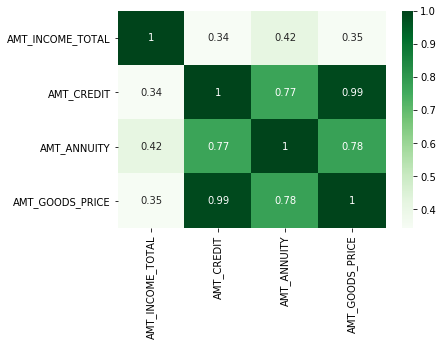

In [53]:
#highly corelated matrix from target 0
cor_matrix=appl_target_0[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']].corr()
print(cor_matrix)
sns.heatmap(cor_matrix,annot=True,cmap="Greens")
plt.show()

In [54]:
corr_df.head()

,Var1,Var2,Correlation,Correlation_abs
425,FLAG_EMP_PHONE,DAYS_EMPLOYED,-0.9998,0.9998
196,AMT_GOODS_PRICE,AMT_CREDIT,0.9873,0.9873
593,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.9501,0.9501
514,CNT_FAM_MEMBERS,CNT_CHILDREN,0.8786,0.8786
692,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.8619,0.8619


In [55]:
#finding the correlation for Target 1
corr1=appl_target_1.corr()
corr=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_df1=corr.unstack().reset_index()
corr_df1.columns=['Var1','Var2','Correlation']
corr_df1.dropna(subset=['Correlation'],inplace=True)
corr_df1['Correlation_abs']=corr_df1['Correlation'].abs()
corr_df1.sort_values('Correlation_abs',ascending=False, inplace=True)

In [56]:
corr_df1.head(20)

,Var1,Var2,Correlation,Correlation_abs
425,FLAG_EMP_PHONE,DAYS_EMPLOYED,-0.9998,0.9998
196,AMT_GOODS_PRICE,AMT_CREDIT,0.9873,0.9873
593,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.9501,0.9501
514,CNT_FAM_MEMBERS,CNT_CHILDREN,0.8786,0.8786
692,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.8619,0.8619
791,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.8304,0.8304
197,AMT_GOODS_PRICE,AMT_ANNUITY,0.7767,0.7767
164,AMT_ANNUITY,AMT_CREDIT,0.7713,0.7713
296,DAYS_EMPLOYED,DAYS_BIRTH,0.6261,0.6261
424,FLAG_EMP_PHONE,DAYS_BIRTH,-0.6221,0.6221


                  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE
AMT_INCOME_TOTAL            1.0000      0.0381       0.0464           0.0376
AMT_CREDIT                  0.0381      1.0000       0.7522           0.9831
AMT_ANNUITY                 0.0464      0.7522       1.0000           0.7527
AMT_GOODS_PRICE             0.0376      0.9831       0.7527           1.0000


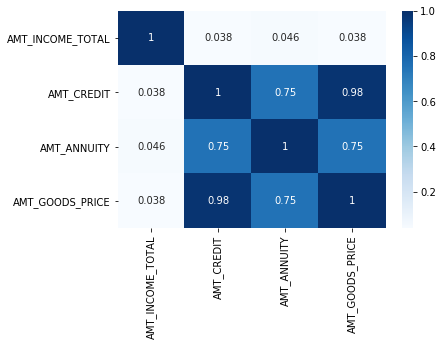

In [57]:
#highly corelated matrix from target 1
cor_matrix=appl_target_1[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']].corr()
print(cor_matrix)
sns.heatmap(cor_matrix,annot=True,cmap="Blues")
plt.show()

#### Univariate analysis for Target 0 and Target 1 Continuous Variable

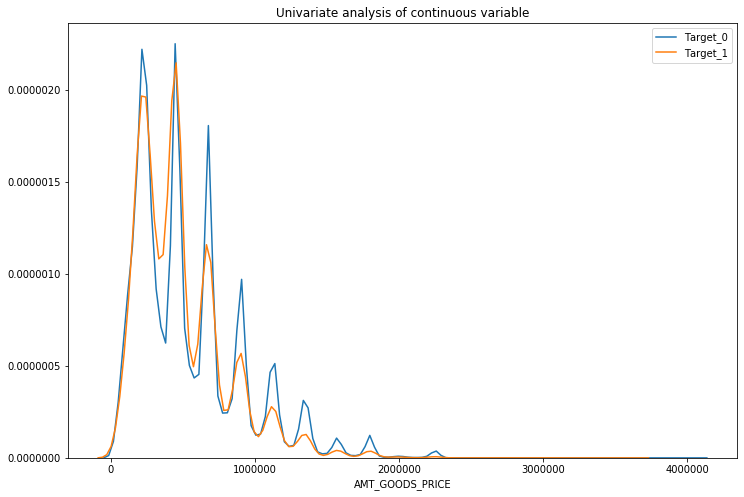

In [58]:
#plotting a distplot for AMT_GOODS_PRICE for both dataframes appl_target_0 and appl_target_1
plt.figure(figsize=(12,8))
plt.title("Univariate analysis of continuous variable")
sns.distplot(appl_target_0.AMT_GOODS_PRICE,hist=False, label='Target_0')
sns.distplot(appl_target_1.AMT_GOODS_PRICE,hist=False, label='Target_1')
plt.show()

### univariate analysis for continous variable for both Target 1 and Target 0 

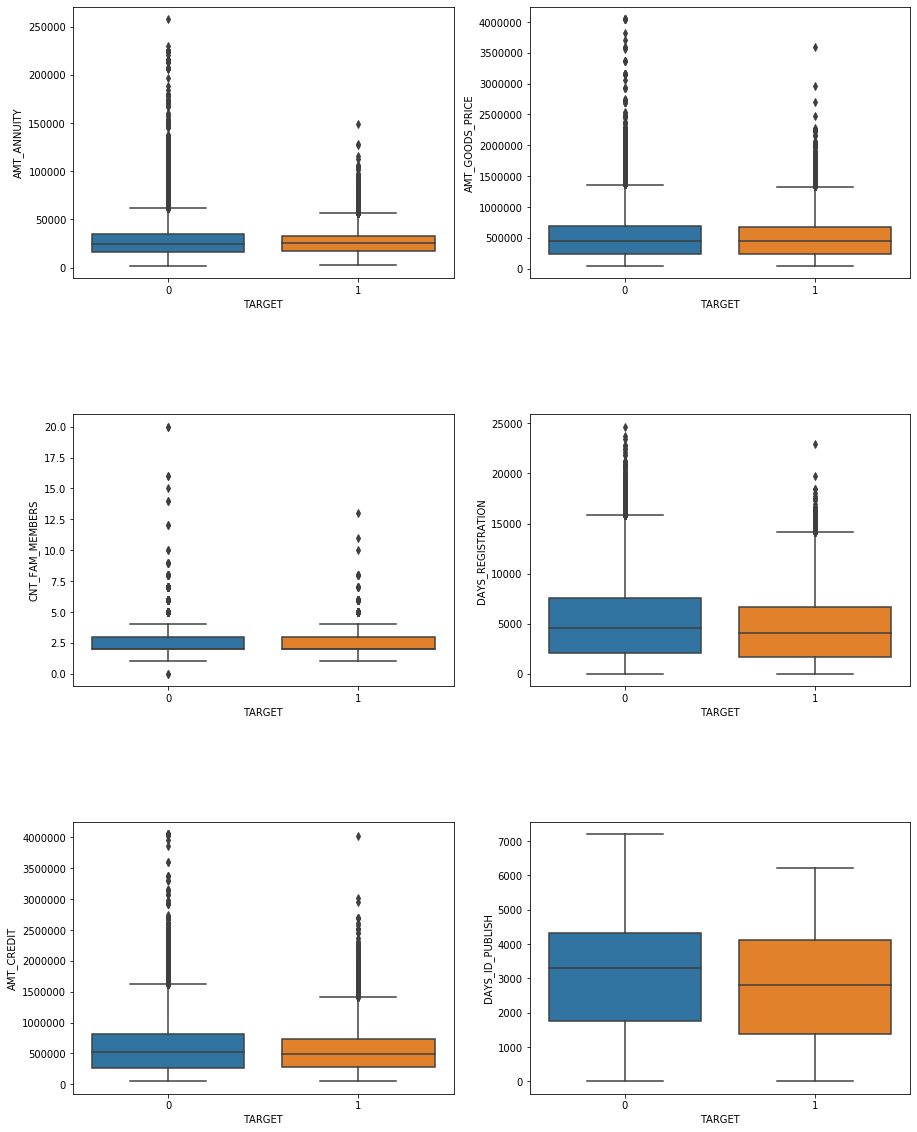

In [60]:
#univariate analysis for continous variable
conti_varibable = ['AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS','DAYS_REGISTRATION','AMT_CREDIT','DAYS_ID_PUBLISH']
plt.figure(figsize = (15, 20))

for i in enumerate(conti_varibable):
    plt.subplot(3, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.boxplot(x = 'TARGET', y = i[1], data =appl_df)

### Bivariate analysis for Target 0 and Target 1

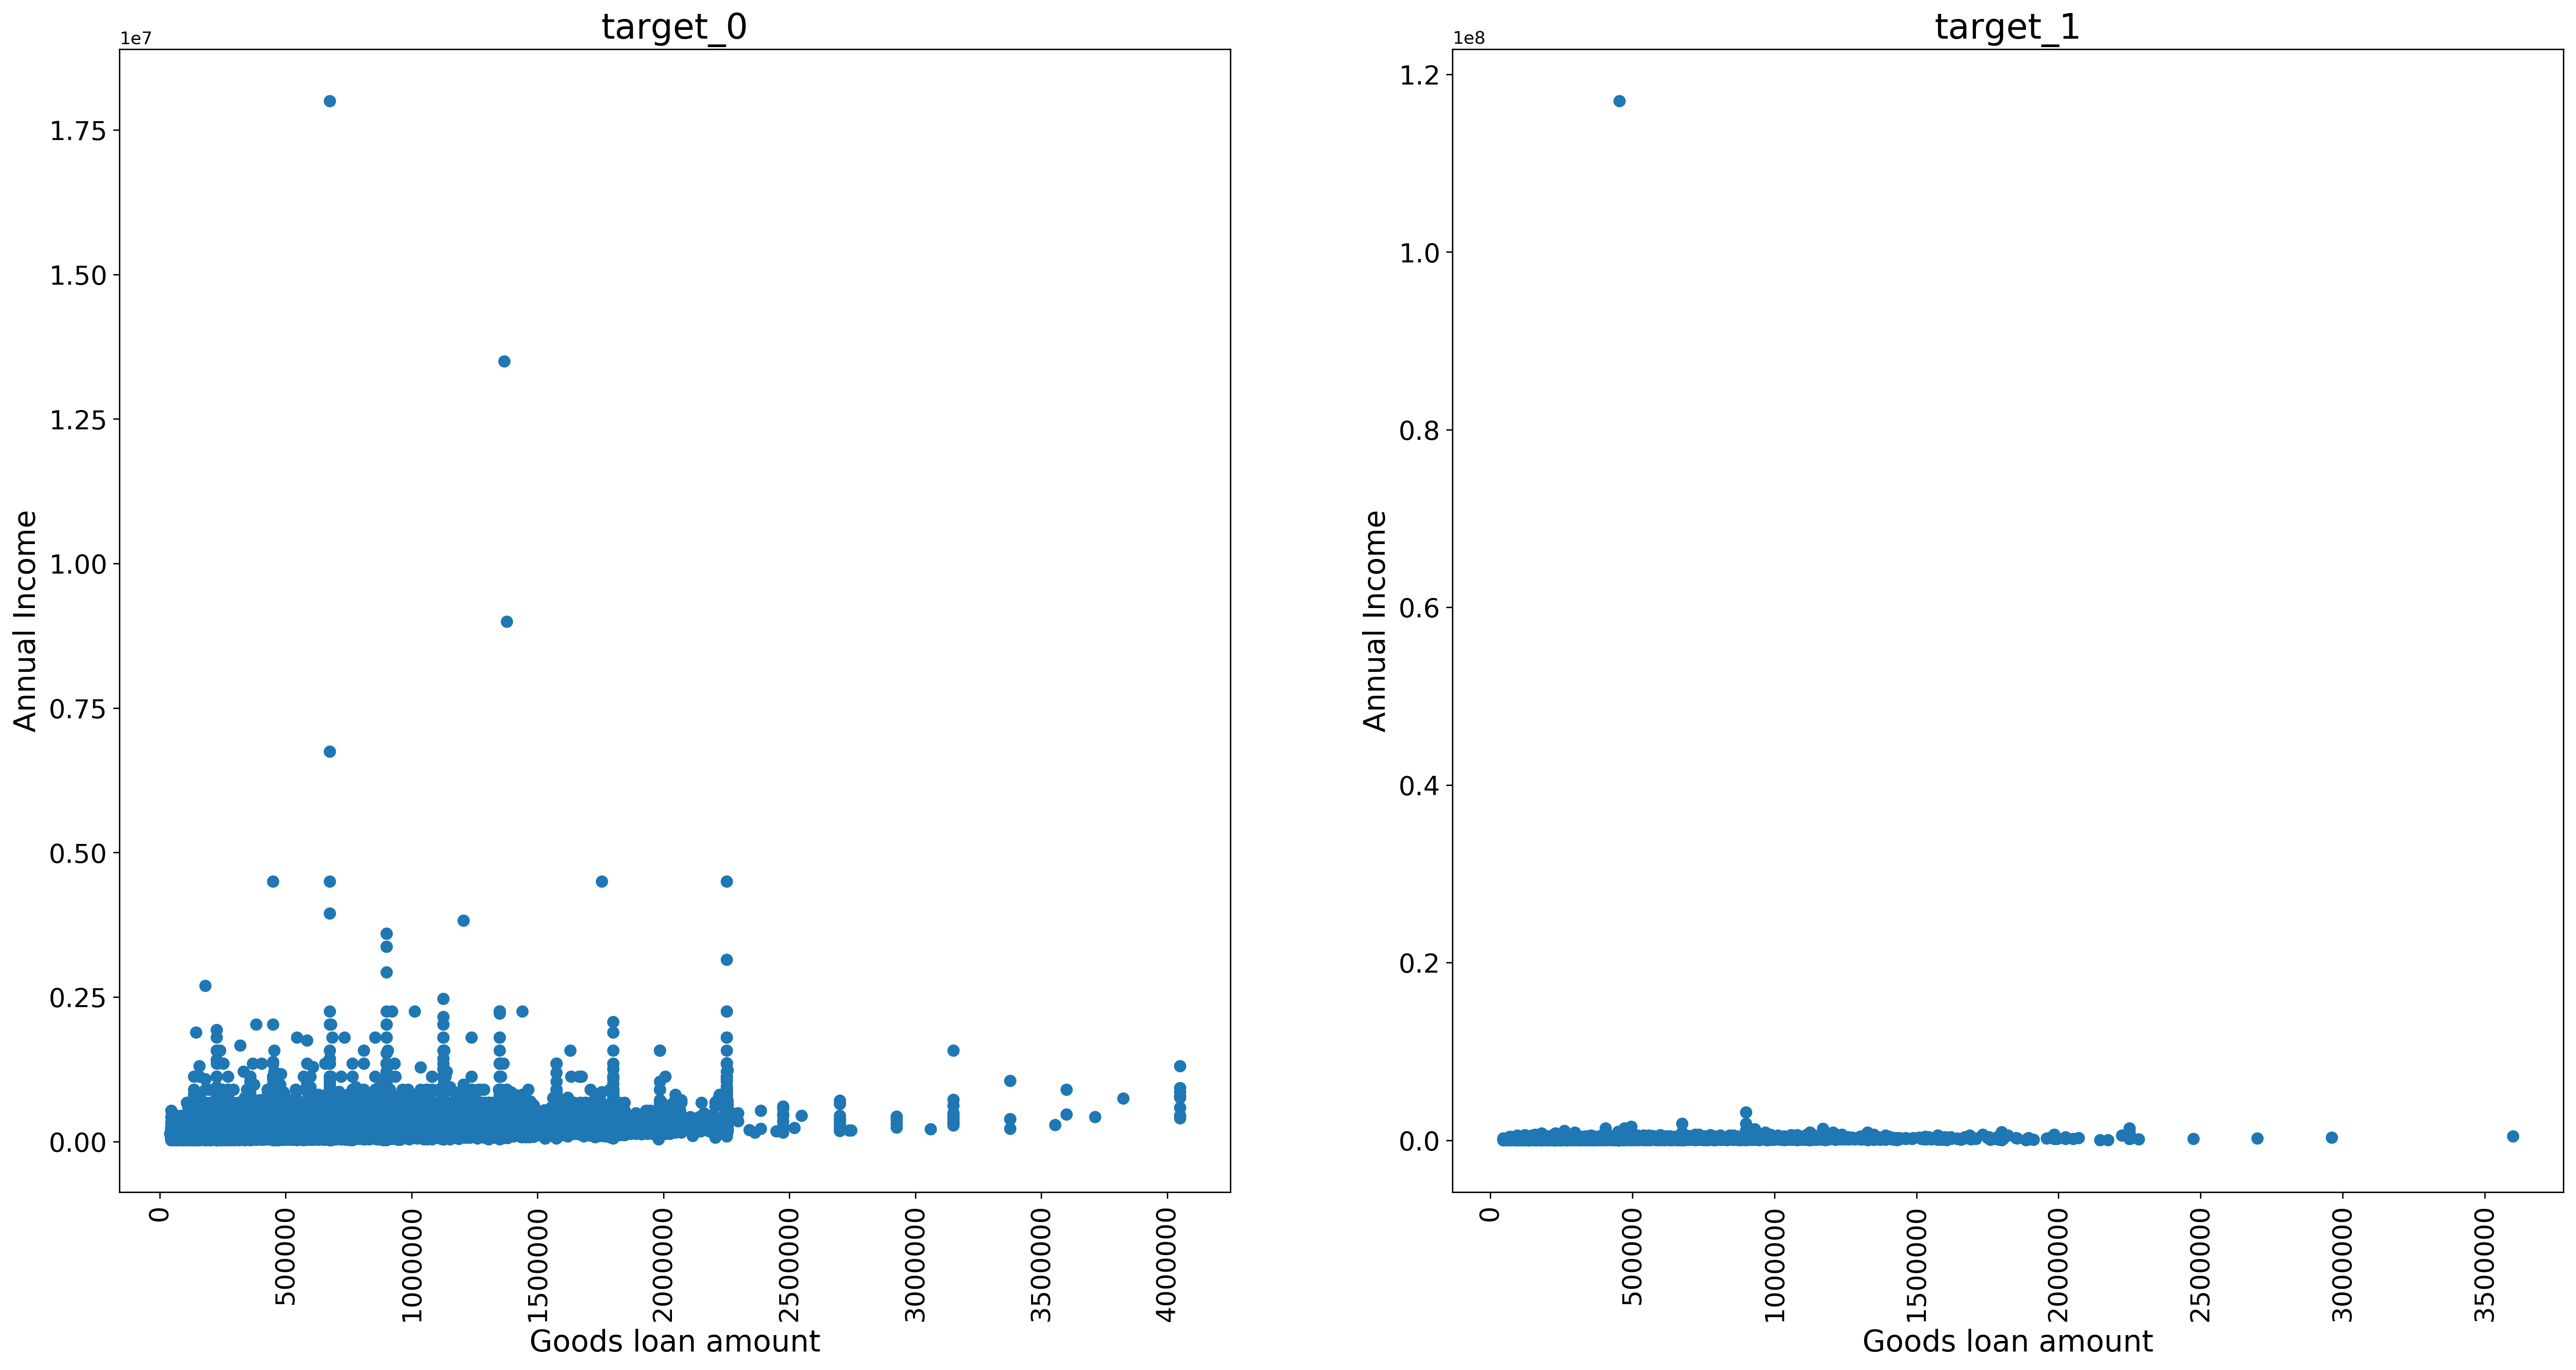

In [61]:
#continous -continuous
plt.figure(figsize=[25,12],dpi=300)
plt.subplot(1,2,1)
plt.title("target_0",fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Goods loan amount",fontsize=17)
plt.ylabel("Annual Income",fontsize=17)
plt.scatter(appl_target_0.AMT_GOODS_PRICE ,appl_target_0.AMT_INCOME_TOTAL)

plt.subplot(1,2,2)
plt.title("target_1",fontsize=20)
plt.xlabel("Goods loan amount",fontsize=17)
plt.ylabel("Annual Income",fontsize=17)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.scatter(appl_target_1.AMT_GOODS_PRICE ,appl_target_1.AMT_INCOME_TOTAL)
plt.show()

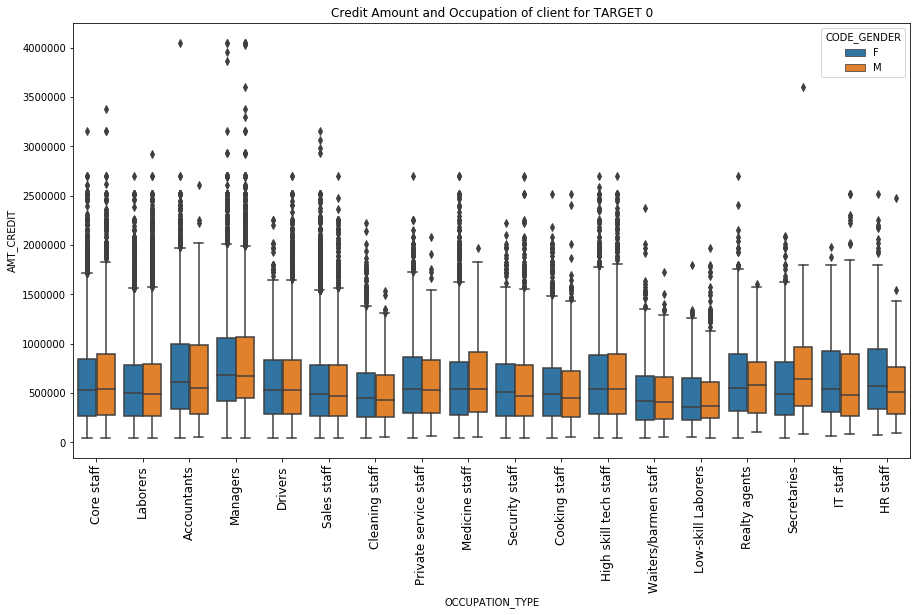

In [62]:
#bivariate analysis of Continuous-Categorical columns for target 0
plt.figure(figsize = (15,8))
plt.xticks(rotation=90,fontsize=12)
sns.boxplot(data=appl_target_0,x='OCCUPATION_TYPE', y='AMT_CREDIT',hue='CODE_GENDER',orient="v")
plt.title("Credit Amount and Occupation of client for TARGET 0")
plt.show()

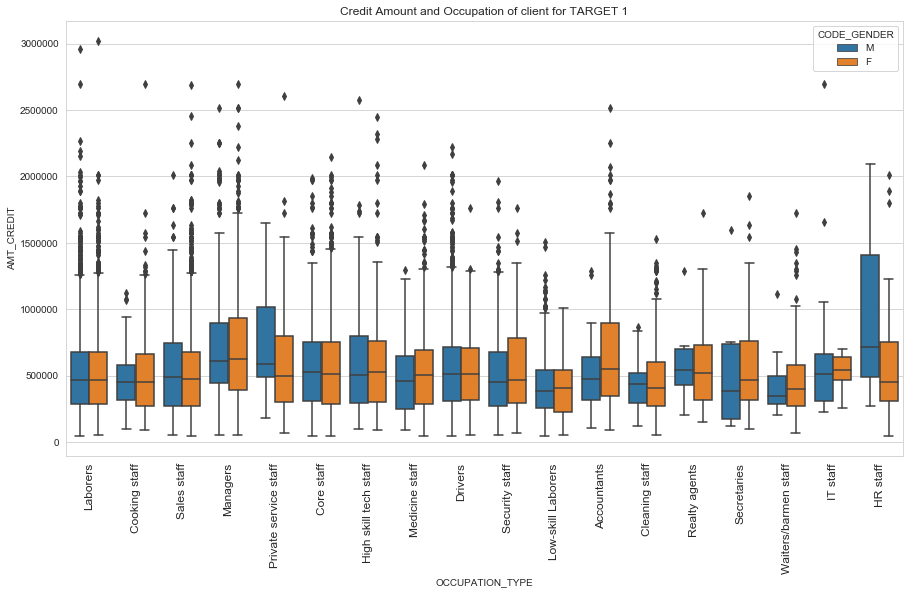

In [89]:
#bivariate analysis of Continuous-Categorical columns for target 1
plt.figure(figsize = (15,8))
plt.xticks(rotation=90,fontsize=12)
sns.boxplot(data=appl_target_1,x='OCCUPATION_TYPE', y='AMT_CREDIT',hue='CODE_GENDER',orient="v")
plt.title("Credit Amount and Occupation of client for TARGET 1")
plt.show()

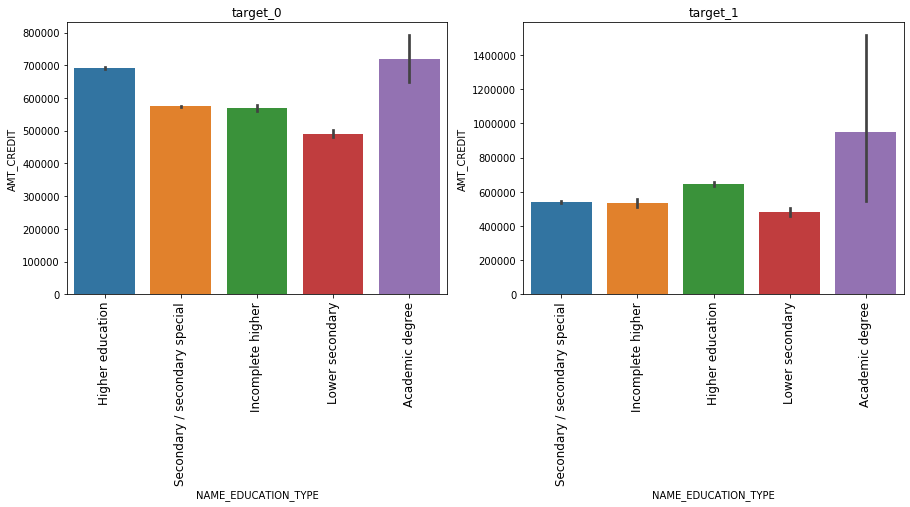

In [64]:
#bivariate categorical -conitnous
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.title("target_0")
plt.xticks(rotation=90,fontsize=12)
sns.barplot(appl_target_0.NAME_EDUCATION_TYPE ,appl_target_0.AMT_CREDIT)
plt.subplot(1,2,2)
plt.title("target_1")
plt.xticks(rotation=90,fontsize=12)
sns.barplot(appl_target_1.NAME_EDUCATION_TYPE,appl_target_1.AMT_CREDIT)
plt.show()

### Reading the second dataset  -Previous_application.csv

In [65]:
prev_df=pd.read_csv("previous_application.csv")
prev_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.4300,17145.0000,17145.0000,0.0000,17145.0000,SATURDAY,15,Y,1,0.0000,0.1828,0.8673,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0000,middle,POS mobile with interest,365243.0000,-42.0000,300.0000,-42.0000,-37.0000,0.0000
1,2802425,108129,Cash loans,25188.6150,607500.0000,679671.0000,nan,607500.0000,THURSDAY,11,Y,1,nan,nan,nan,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0000,low_action,Cash X-Sell: low,365243.0000,-134.0000,916.0000,365243.0000,365243.0000,1.0000
2,2523466,122040,Cash loans,15060.7350,112500.0000,136444.5000,nan,112500.0000,TUESDAY,11,Y,1,nan,nan,nan,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0000,high,Cash X-Sell: high,365243.0000,-271.0000,59.0000,365243.0000,365243.0000,1.0000
3,2819243,176158,Cash loans,47041.3350,450000.0000,470790.0000,nan,450000.0000,MONDAY,7,Y,1,nan,nan,nan,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0000,middle,Cash X-Sell: middle,365243.0000,-482.0000,-152.0000,-182.0000,-177.0000,1.0000
4,1784265,202054,Cash loans,31924.3950,337500.0000,404055.0000,nan,337500.0000,THURSDAY,9,Y,1,nan,nan,nan,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0000,high,Cash Street: high,nan,nan,nan,nan,nan,nan


In [66]:
prev_df.shape

(1670214, 37)

In [67]:
#finding the percentage of missing values for all the columns
prev_df.isnull().mean() 

SK_ID_PREV                    0.0000
SK_ID_CURR                    0.0000
NAME_CONTRACT_TYPE            0.0000
AMT_ANNUITY                   0.2229
AMT_APPLICATION               0.0000
AMT_CREDIT                    0.0000
AMT_DOWN_PAYMENT              0.5364
AMT_GOODS_PRICE               0.2308
WEEKDAY_APPR_PROCESS_START    0.0000
HOUR_APPR_PROCESS_START       0.0000
FLAG_LAST_APPL_PER_CONTRACT   0.0000
NFLAG_LAST_APPL_IN_DAY        0.0000
RATE_DOWN_PAYMENT             0.5364
RATE_INTEREST_PRIMARY         0.9964
RATE_INTEREST_PRIVILEGED      0.9964
NAME_CASH_LOAN_PURPOSE        0.0000
NAME_CONTRACT_STATUS          0.0000
DAYS_DECISION                 0.0000
NAME_PAYMENT_TYPE             0.0000
CODE_REJECT_REASON            0.0000
NAME_TYPE_SUITE               0.4912
NAME_CLIENT_TYPE              0.0000
NAME_GOODS_CATEGORY           0.0000
NAME_PORTFOLIO                0.0000
NAME_PRODUCT_TYPE             0.0000
CHANNEL_TYPE                  0.0000
SELLERPLACE_AREA              0.0000
N

In [68]:
#To remove the columns with missing values greater than 50% 
prev_df = prev_df.loc[:, prev_df.isnull().mean() < .5]
prev_df.shape

(1670214, 33)

In [69]:
#checking for various column value and counts
prev_df.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

In [70]:
#Replacing  XNA and XAP values with NAN's
prev_df['NAME_CASH_LOAN_PURPOSE']=prev_df['NAME_CASH_LOAN_PURPOSE'].replace('XNA',np.NaN)
prev_df['NAME_CASH_LOAN_PURPOSE']=prev_df['NAME_CASH_LOAN_PURPOSE'].replace('XAP',np.NaN)


In [71]:
prev_df.NAME_CASH_LOAN_PURPOSE.value_counts()

Repairs                             23765
Other                               15608
Urgent needs                         8412
Buying a used car                    2888
Building a house or an annex         2693
Everyday expenses                    2416
Medicine                             2174
Payments on other loans              1931
Education                            1573
Journey                              1239
Purchase of electronic equipment     1061
Buying a new car                     1012
Wedding / gift / holiday              962
Buying a home                         865
Car repairs                           797
Furniture                             749
Buying a holiday home / land          533
Business development                  426
Gasification / water supply           300
Buying a garage                       136
Hobby                                  55
Money for a third person               25
Refusal to name the goal               15
Name: NAME_CASH_LOAN_PURPOSE, dtyp

#### merging application_data.csv and prev_applciation_data.csv on column SK_ID_CURR

In [72]:
#merging the application data with prev_appliction data
new_merged_df=pd.merge(left=appl_df,right=prev_df,how='inner',on='SK_ID_CURR',suffixes='_x')


In [73]:
prev_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 33 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       69635 non-null    object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [74]:
new_merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,YEARS_BEGINEXPLUATATION_AVG,EMERGENCYSTATE_MODE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_GOODS_PRICE_CAT,AMT_INCOME_TOTAL_CAT,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_ANNUITYx,AMT_APPLICATION,AMT_CREDITx,AMT_GOODS_PRICEx,WEEKDAY_APPR_PROCESS_STARTx,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEx,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0000,406597.5000,24700.5000,351000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0188,9461,637,3648,2120,1,1,0,1,Laborers,1,2,2,WEDNESDAY,0,0,0,0,0,0,Business Entity Type 3,0.9722,No,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,avg,high,1038818,Consumer loans,9251.7750,179055.0000,179055.0000,179055.0000,SATURDAY,9,Y,1,NaN,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0000,low_normal,POS other with interest,365243.0000,-565.0000,125.0000,-25.0000,-17.0000,0.0000
1,100003,0,Cash loans,F,N,N,0,270000.0000,1293502.5000,35698.5000,1129500.0000,Family,State servant,Higher education,Married,House / apartment,0.0035,16765,1188,1186,291,1,1,0,1,Core staff,2,1,1,MONDAY,0,0,0,0,0,0,School,0.9851,No,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,high,high,1810518,Cash loans,98356.9950,900000.0000,1035882.0000,900000.0000,FRIDAY,12,Y,1,NaN,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0000,low_normal,Cash X-Sell: low,365243.0000,-716.0000,-386.0000,-536.0000,-527.0000,1.0000
2,100003,0,Cash loans,F,N,N,0,270000.0000,1293502.5000,35698.5000,1129500.0000,Family,State servant,Higher education,Married,House / apartment,0.0035,16765,1188,1186,291,1,1,0,1,Core staff,2,1,1,MONDAY,0,0,0,0,0,0,School,0.9851,No,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,high,high,2636178,Consumer loans,64567.6650,337500.0000,348637.5000,337500.0000,SUNDAY,17,Y,1,NaN,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0000,middle,POS industry with interest,365243.0000,-797.0000,-647.0000,-647.0000,-639.0000,0.0000
3,100003,0,Cash loans,F,N,N,0,270000.0000,1293502.5000,35698.5000,1129500.0000,Family,State servant,Higher education,Married,House / apartment,0.0035,16765,1188,1186,291,1,1,0,1,Core staff,2,1,1,MONDAY,0,0,0,0,0,0,School,0.9851,No,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,high,high,2396755,Consumer loans,6737.3100,68809.5000,68053.5000,68809.5000,SATURDAY,15,Y,1,NaN,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0000,middle,POS household with interest,365243.0000,-2310.0000,-1980.0000,-1980.0000,-1976.0000,1.0000
4,100004,0,Revolving loans,M,Y,Y,0,67500.0000,135000.0000,6750.0000,135000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0100,19046,225,4

### Univariate analysis

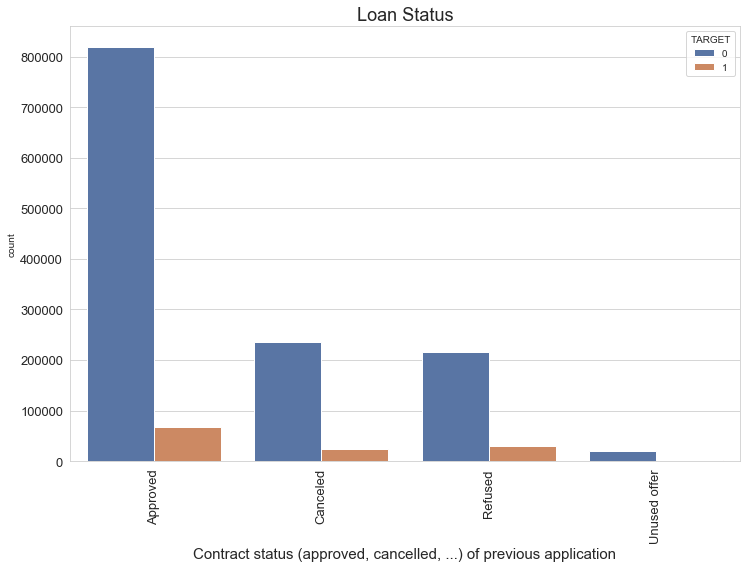

In [75]:
# Distribution of NAME_CONTRACT_STATUS - categorical columns
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
sns.countplot(data = new_merged_df, x= 'NAME_CONTRACT_STATUS',hue = 'TARGET',palette="deep")
plt.xticks(rotation=90,fontsize=13)
plt.yticks(fontsize=13)
plt.title('Loan Status',fontsize=18)
plt.xlabel("Contract status (approved, cancelled, ...) of previous application",fontsize=15)
plt.show()

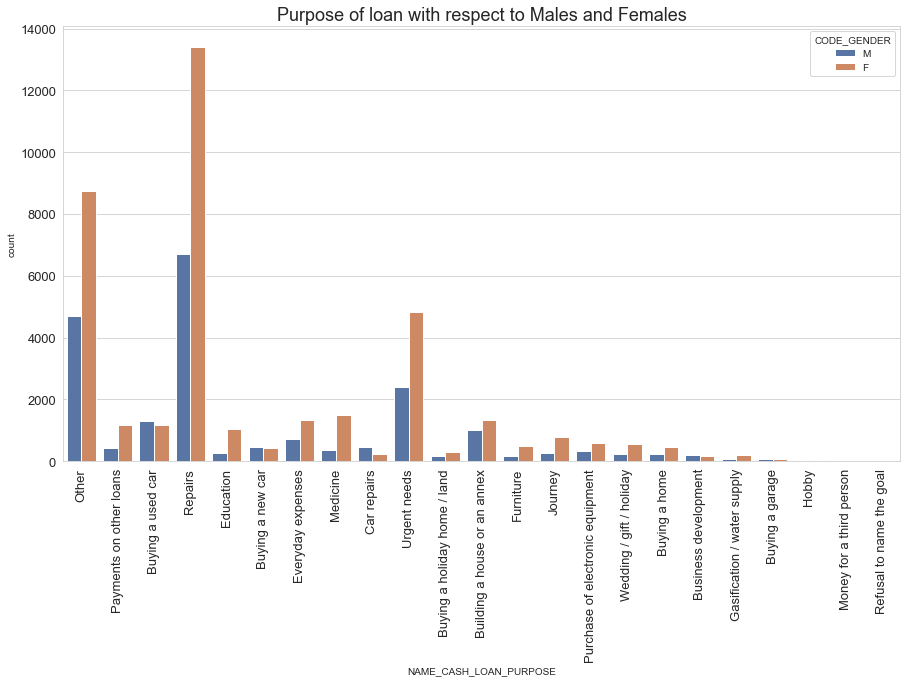

In [91]:
#Univariate categorical analysis for NAME_CASH_LOAN_PURPOSE
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
sns.countplot(data = new_merged_df, x= 'NAME_CASH_LOAN_PURPOSE',hue = 'CODE_GENDER',palette="deep")
plt.xticks(rotation=90,fontsize=13)
plt.yticks(fontsize=13)
plt.title('Purpose of loan with respect to Males and Females',fontsize=18)
plt.show()

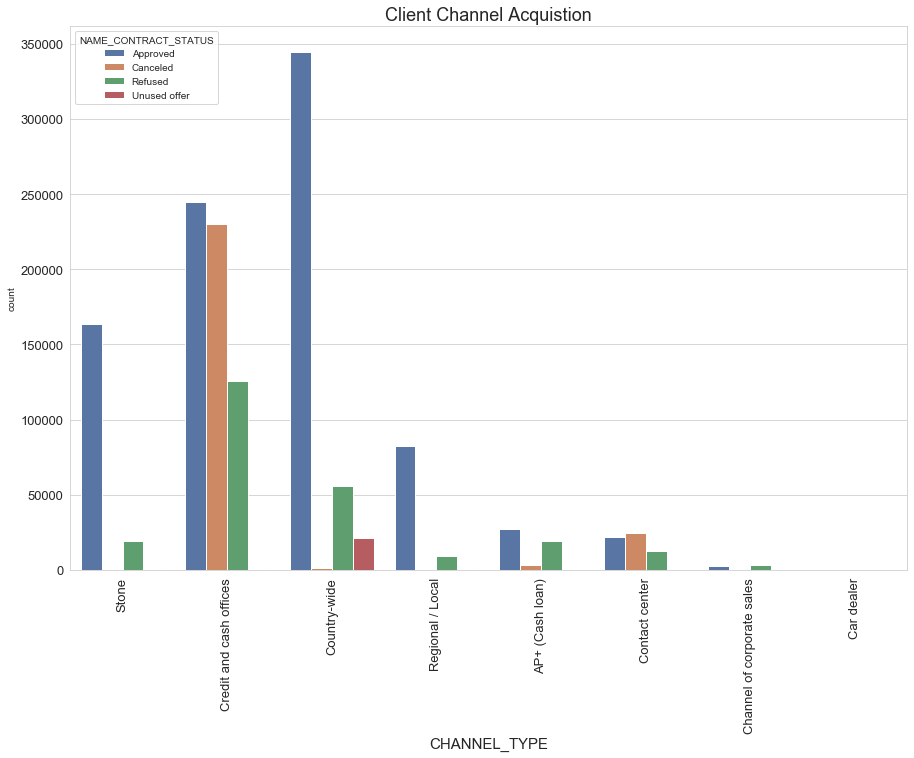

In [77]:
#Univariate categorical analysis for CHANNEL_TYPE
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))

sns.countplot(data = new_merged_df, x= 'CHANNEL_TYPE',hue ='NAME_CONTRACT_STATUS',palette="deep")
plt.xticks(rotation=90,fontsize=13)
plt.yticks(fontsize=13)
plt.title('Client Channel Acquistion',fontsize=18)
plt.xlabel("CHANNEL_TYPE",fontsize=15)
plt.show()

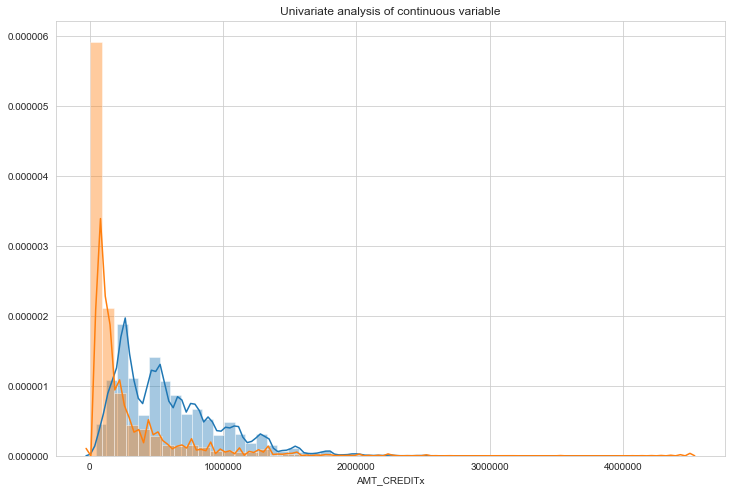

In [78]:
#univariate contniuous
plt.figure(figsize=(12,8))
plt.title("Univariate analysis of continuous variable")
sns.distplot(new_merged_df.AMT_CREDIT_,hist=True, label='Current Appl')
sns.distplot(new_merged_df.AMT_CREDITx,hist=True ,label='Prev Appl')
plt.show()

### Bivariate analysis

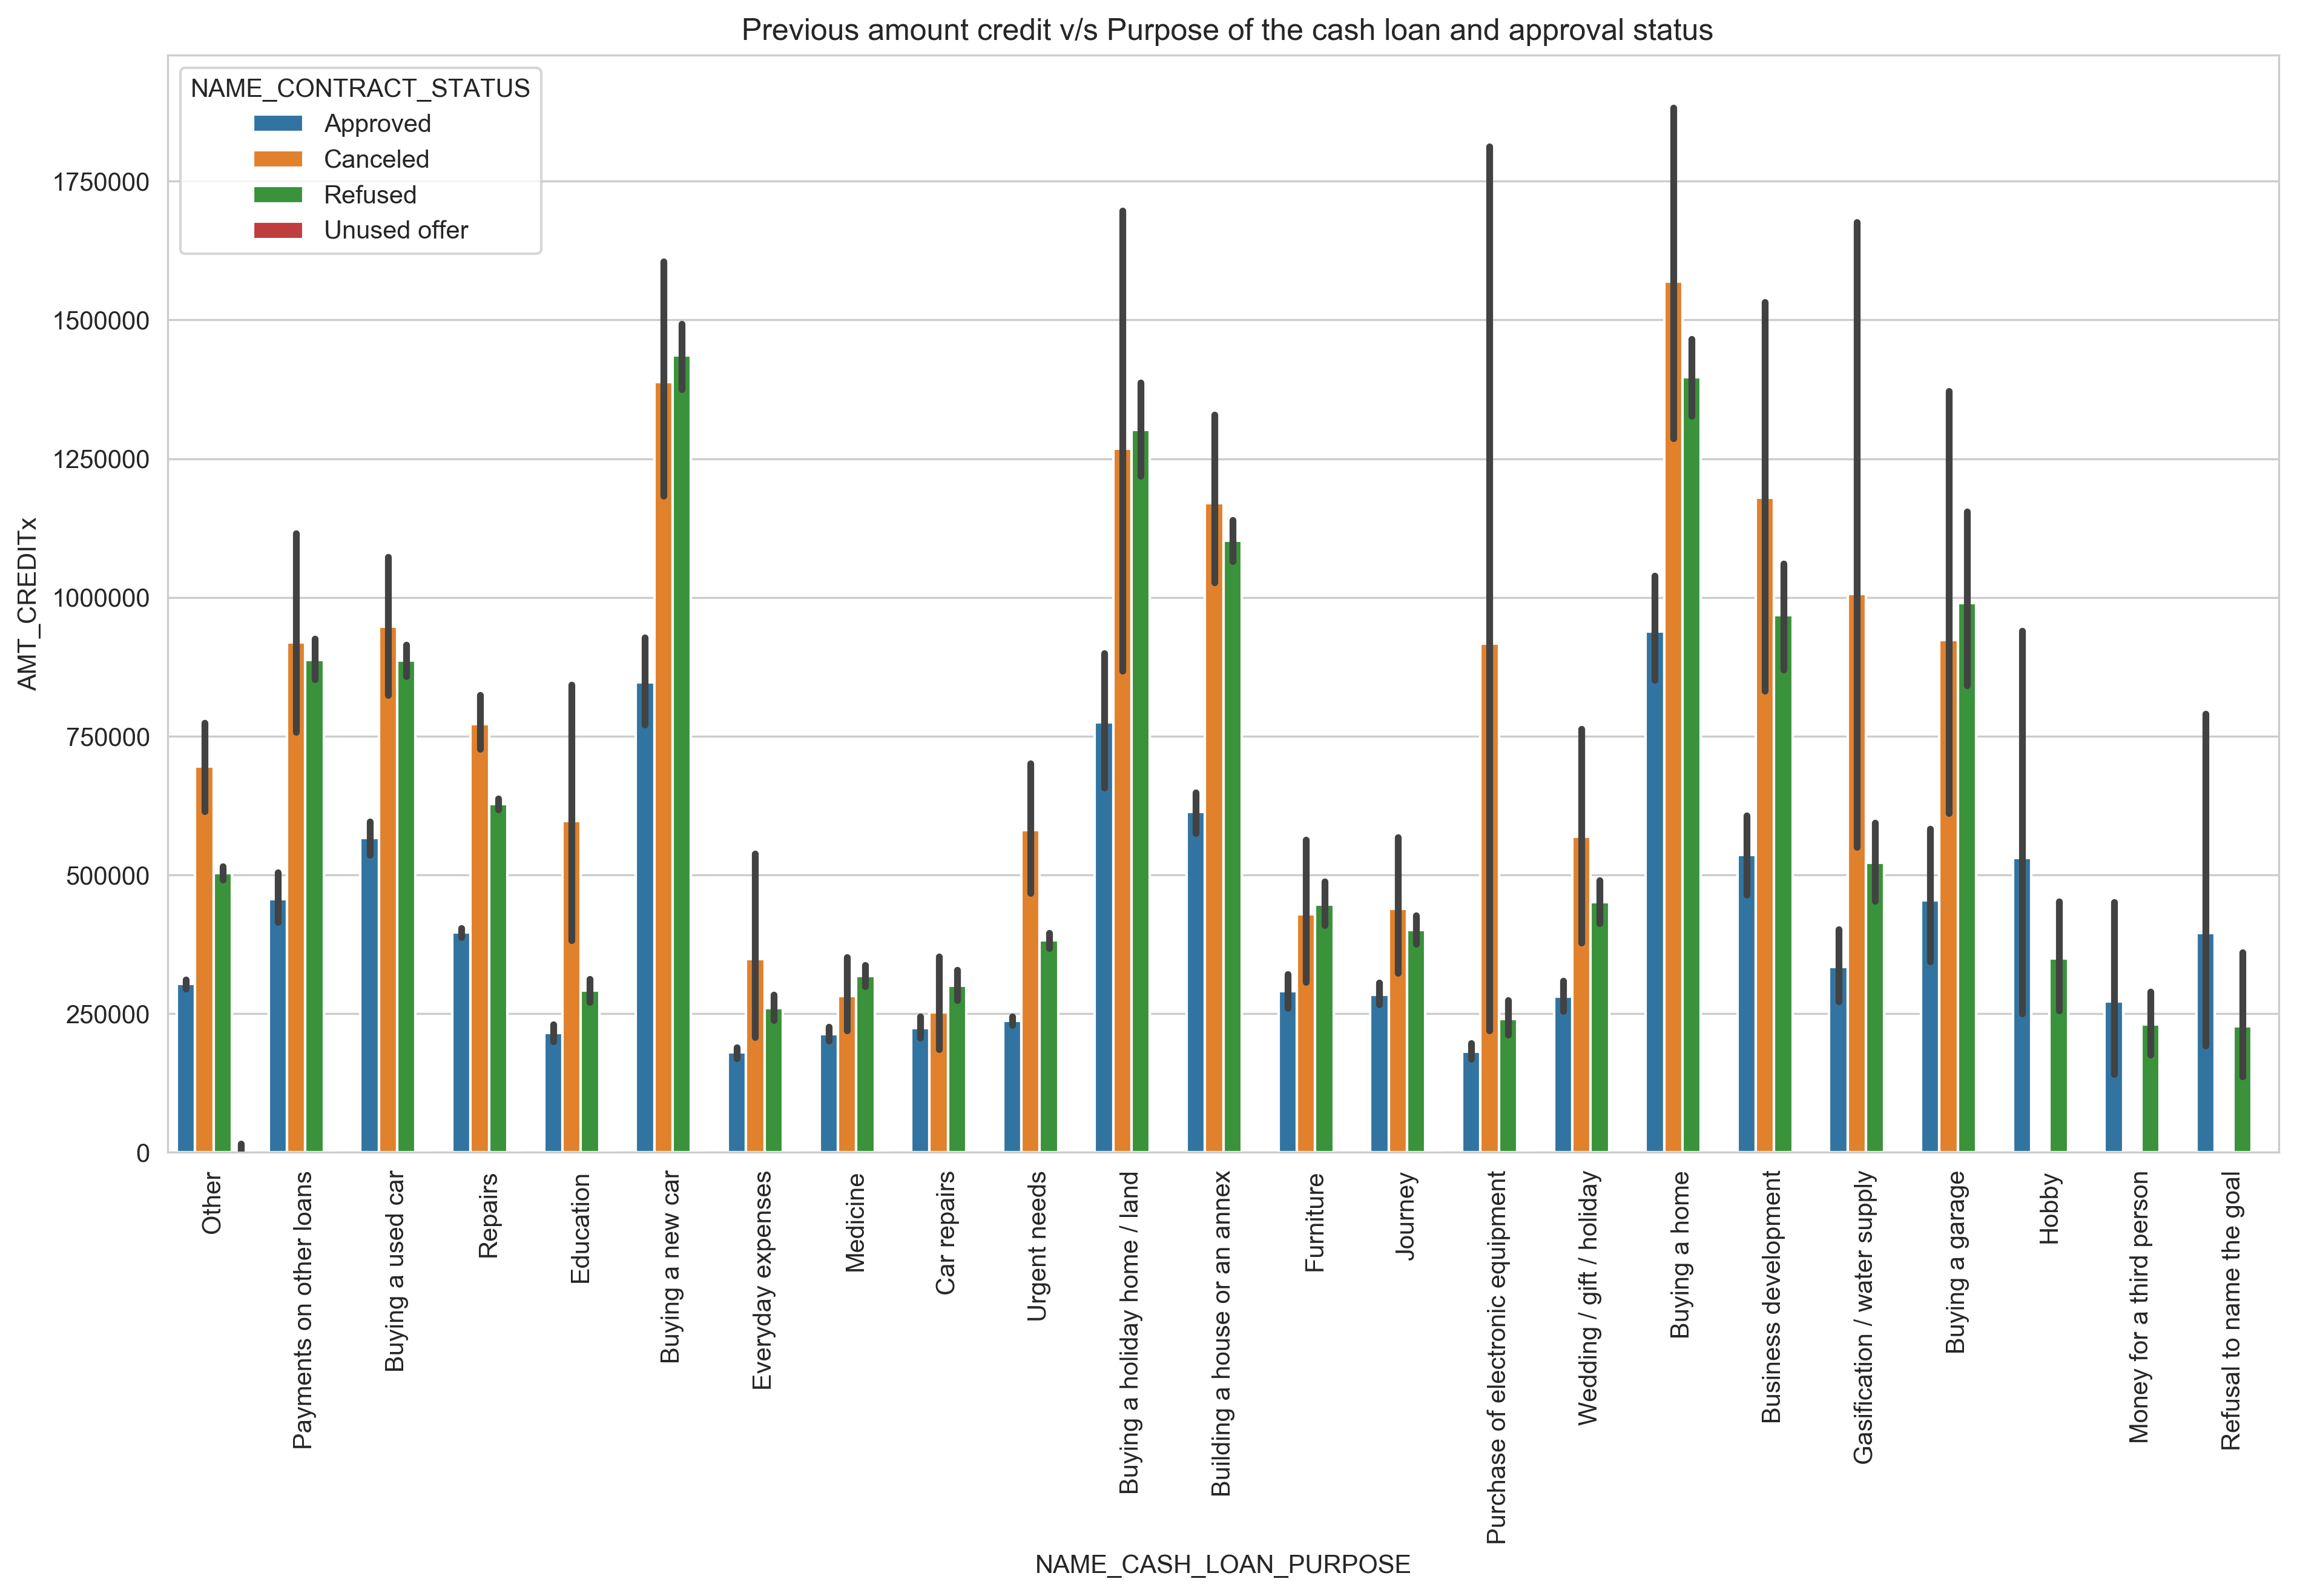

In [79]:
#categorical -continuous
plt.figure(figsize = (15,8),dpi=300)
plt.xticks(rotation=90)
plt.title(" Previous amount credit v/s Purpose of the cash loan and approval status")
sns.barplot(new_merged_df['NAME_CASH_LOAN_PURPOSE'], new_merged_df['AMT_CREDITx'],hue=new_merged_df['NAME_CONTRACT_STATUS'])
plt.show()

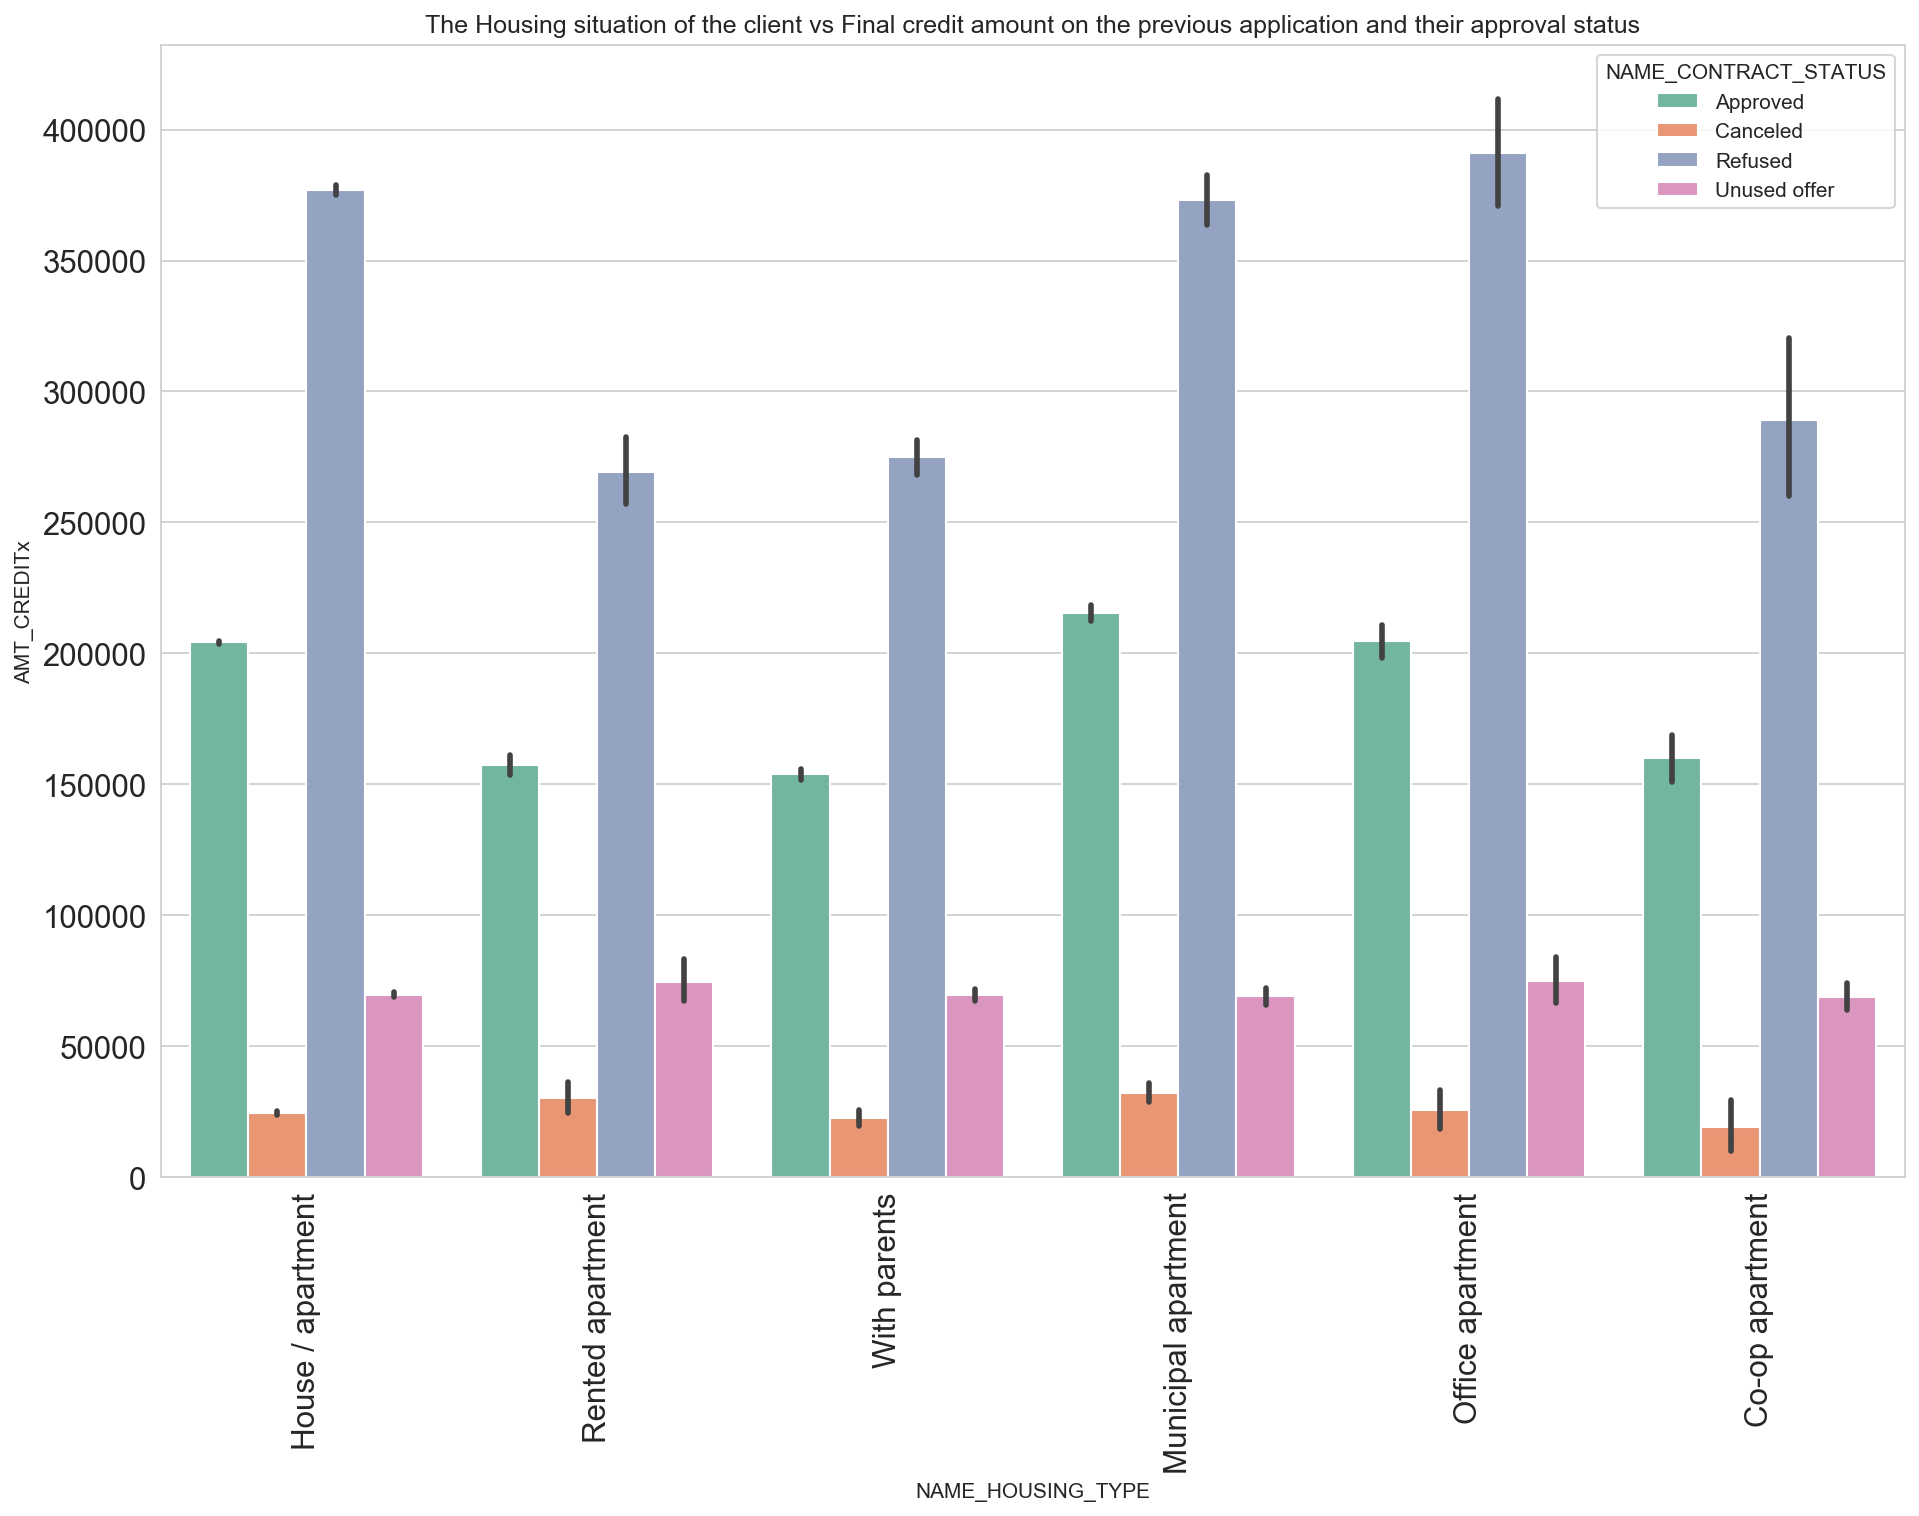

In [80]:
plt.figure(figsize=(15,10),dpi = 150)
plt.xticks(rotation=90)
sns.barplot(data =new_merged_df,x='NAME_HOUSING_TYPE', y='AMT_CREDITx',hue='NAME_CONTRACT_STATUS',palette='Set2')
plt.title("The Housing situation of the client vs Final credit amount on the previous application and their approval status")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

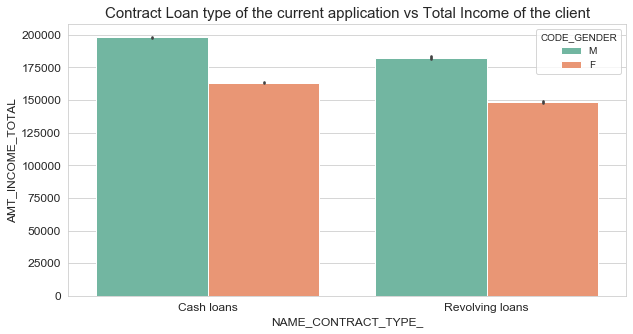

In [81]:
plt.figure(figsize=(10,5))
sns.barplot(data =new_merged_df,x='NAME_CONTRACT_TYPE_', y='AMT_INCOME_TOTAL',hue='CODE_GENDER',palette='Set2')
plt.title("Contract Loan type of the current application vs Total Income of the client",fontsize=15)
plt.xlabel('NAME_CONTRACT_TYPE_',fontsize=12)
plt.ylabel('AMT_INCOME_TOTAL',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

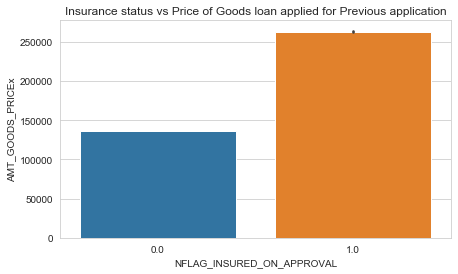

In [96]:
#categorical -continuous
plt.figure(figsize=(7,4))
plt.title("Insurance status vs Price of Goods loan applied for Previous application")
sns.barplot(new_merged_df['NFLAG_INSURED_ON_APPROVAL'], new_merged_df['AMT_GOODS_PRICEx'])
plt.show()

In [93]:
# replaciong XNA values
new_merged_df['NAME_CLIENT_TYPE']=new_merged_df['NAME_CLIENT_TYPE'].replace('XNA',np.NaN)

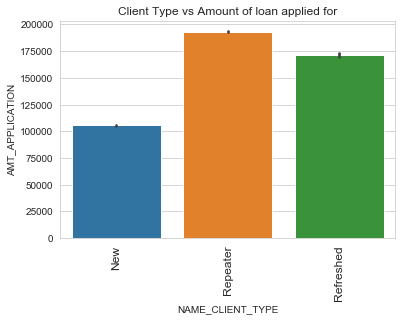

In [85]:
#
plt.xticks(rotation=90,fontsize=12)
plt.title("Client Type vs Amount of loan applied for",fontsize=12)
sns.barplot(new_merged_df['NAME_CLIENT_TYPE'], new_merged_df['AMT_APPLICATION'])
plt.show()

### Conclusion: